Results from replication of ITU study on breastdata

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
current_directory = os.environ['HOME']
model_name_ImgNet = "Mei_repli_ResNet50_ImgNet"
model_name_RadNet = "Mei_repli_ResNet50_RadNet"
lr = 0.0001 
image_size = 256

# Training summary:

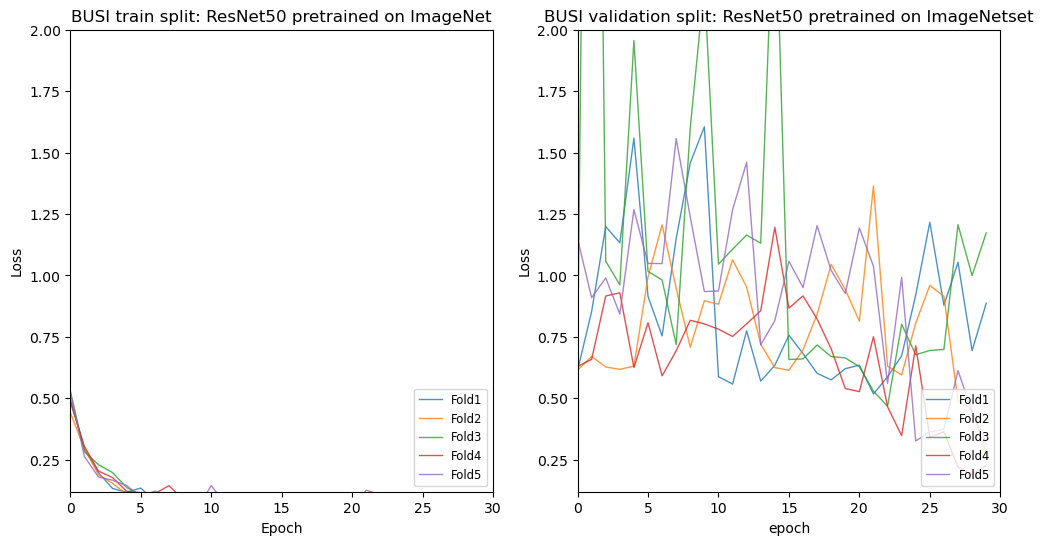

/scratch/usertmp/ipykernel_1082768/3177092976.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)


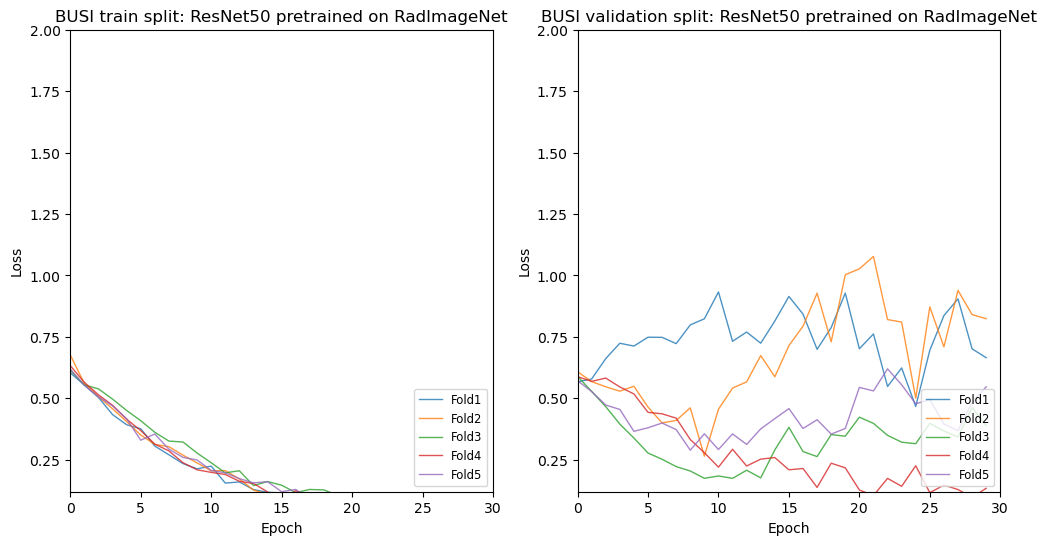

In [12]:
#Mei:
_xlim = [0,30]
_ylim = [0.12,2]

#ImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/Mei/pretrained_ImageNet/training_history/breast-fold" + str(i+1) + "-" + model_name_ImgNet + "-"+str(lr)+ ".csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])

#Train
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_aucs[i])
        ax1.plot(
            train_losses[i],
            #color="orangered",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on ImageNet',
    )
ax1.legend(loc="lower right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax2.plot(
            val_losses[i],
            #color="b",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on ImageNetset',
    )
ax2.legend(loc="lower right",fontsize='small')
plt.show()

#RadImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/Mei/pretrained_RadNet/training_history/breast-fold" + str(i+1) + "-" + model_name_RadNet + "-"+str(lr)+ ".csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])
ax2 = fig.add_subplot(122)

#Train:
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax1.plot(
            train_losses[i],
            #color="b",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on RadImageNet',
    )
ax1.legend(loc="lower right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            #color="g",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on RadImageNet',
    )
ax2.legend(loc="lower right",fontsize='small')
plt.show()

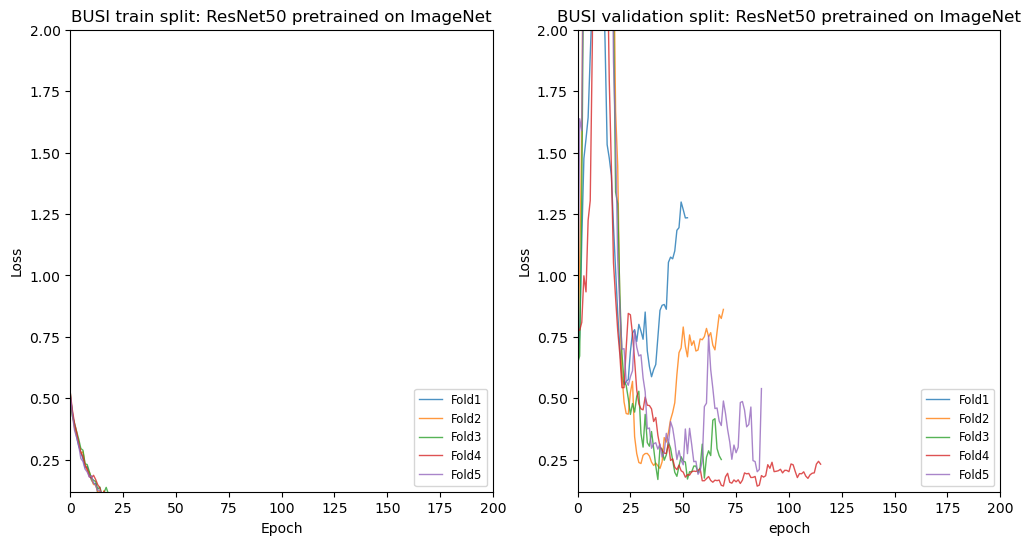

/scratch/usertmp/ipykernel_1082768/1930213830.py:96: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(122)


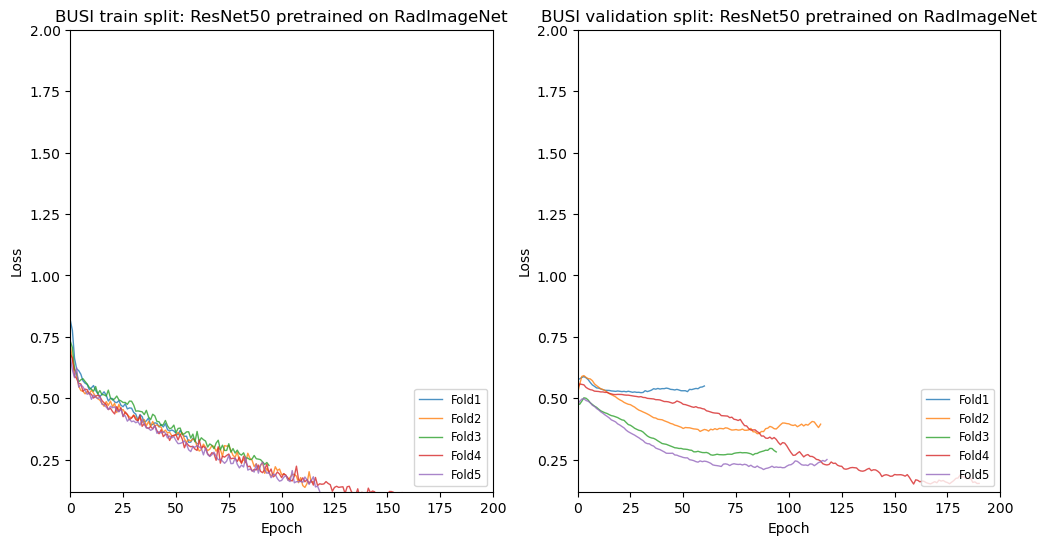

In [19]:
#ITU
_xlim = [0,200]
_ylim = [0.12,2]

#ImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/ITU/freezing_round2/pretrained_ImageNet/training_history/breast-unfreezeall-fold" + str(i+1) + "-RadImageNet-ResNet50_repli_RadImgNet-256-16-1e-05.csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])

#Train
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax1.plot(
            train_losses[i],
            #color="orangered",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on ImageNet',
    )
ax1.legend(loc="lower right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            #color="b",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on ImageNet',
    )
ax2.legend(loc="lower right",fontsize='small')
plt.show()

#RadImageNet
fig = plt.figure(figsize=(12, 6))
train_aucs = []
train_losses = []
val_aucs = []
val_losses = []
for i in range (5):
    ImgNetLoss_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/ITU/freezing_round2/pretrained_RadImageNet/training_history/breast-unfreezeall-fold" + str(i+1) + "-RadImageNet-ResNet50_repli_RadImgNet-256-16-1e-05.csv")
    ImgNetLoss_df = pd.read_csv(ImgNetLoss_path)
    val_aucs.append(np.array(ImgNetLoss_df['val_auc']))
    train_aucs.append(np.array(ImgNetLoss_df['train_auc']))
    val_losses.append(ImgNetLoss_df['val_loss'])
    train_losses.append(ImgNetLoss_df['train_loss'])
ax2 = fig.add_subplot(122)

#Train:
ax1 = fig.add_subplot(121)
for i in range(5):
        epochs_len = len(train_losses[i])
        ax1.plot(
            train_losses[i],
            #color="b",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax1.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI train split: ResNet50 pretrained on RadImageNet',
    )
ax1.legend(loc="lower right",fontsize='small')

#Val
ax2 = fig.add_subplot(122)
for i in range(5):
        epochs_len = len(val_losses[i])
        ax2.plot(
            val_losses[i],
            #color="g",
            label=r"Fold%i" % (i+1),
            lw=1,
            alpha=0.8,
        )
ax2.set(
        xlim=(_xlim),
        ylim=(_ylim),
        xlabel = 'Epoch',
        ylabel = 'Loss',
        title = 'BUSI validation split: ResNet50 pretrained on RadImageNet',
    )
ax2.legend(loc="lower right",fontsize='small')
plt.show()

More plots of the training can be found under the Mei and ITU folder

# Test

Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.


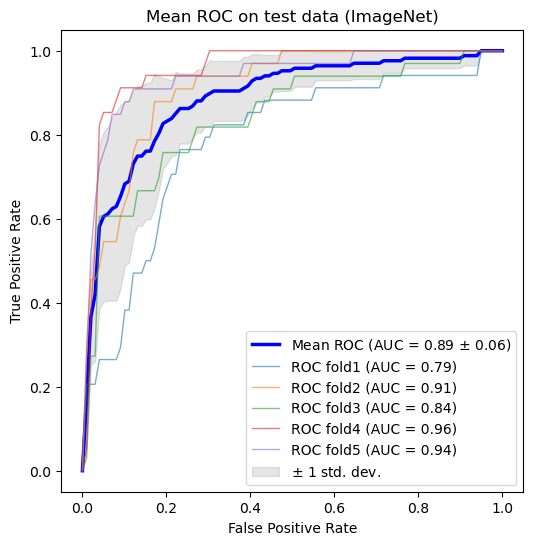

In [6]:
#database = ImageNet
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(5): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Workspace/Replicate_article/data/breast_splits/test_fold"+str(i+1)+".csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'path',
        y_col = 'class',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/Mei/pretrained_ImageNet/weights/fold"+str(i+1)+"-" + model_name_ImgNet + "-"+str(lr)+ ".h5")
    FT_model = load_model(w_path, compile=False)
    probs = FT_model.predict(test_generator)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    ylabels = test_generator.classes
    # calculate scores
    _auc = roc_auc_score(ylabels, probs)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(ylabels, probs)
    del FT_model

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(_auc)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
ImgNet_mean_tpr = mean_tpr
mean_auc = auc(mean_fpr, mean_tpr)
ImgNet_mean_auc = mean_auc
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)
#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
for j in range(5):
    ax.plot(
        mean_fpr,
        tprs[j],
        #color="b",
        label=r"ROC fold%i (AUC = %0.2f)" % (j+1, aucs[j]),
        lw=1,
        alpha=0.6,
    )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC on test data (ImageNet)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

In [7]:
#Test all 5 models pretrained on RadImageNet:
model_performace = []
corrrect_list = []
aucs = []
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(5): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Workspace/Replicate_article/data/breast_splits/test_fold"+str(i+1)+".csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'path',
        y_col = 'class',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/Mei/pretrained_RadNet/weights/fold"+str(i+1)+"-" + model_name_RadNet + "-"+str(lr)+ ".h5") #Saved correct with - and not --
    FT_model = load_model(w_path, compile=False)
    y_pred = tf.math.argmax(FT_model.predict(test_generator),1)
    predctions = tf.Variable(y_pred).numpy().tolist()
    ylabels= test_generator.classes
    correct = sum(i == j for (i,j) in zip(predctions,ylabels))
    y_probs = FT_model.predict(test_generator) #Needs to be probabilities
    # keep probabilities for the positive outcome only
    y_probs = y_probs[:, 1]
    fpr, tpr, thresholds_keras = roc_curve(ylabels,y_probs)
    _auc = auc(fpr, tpr)
    aucs.append(_auc)
    #print('Model from fold',i+1,' Correct: ', correct, ' out of ', len(ylabels), ' (', round(correct/len(ylabels)*100,3),'%)  AUC: ',round(_auc,3))
    corrrect_list.append(correct)
    model_performace.append(_auc)
    del FT_model
print('____________________________________________________________')
print('ResNet50 pretrained on RadImageNet performance on test set:')
testsize = len(ylabels)
for i in range(5):
    print(' - Fold'+str(i+1)+' model: Correct: '+str(corrrect_list[i])+'/'+str(testsize)+' ('+str(round(corrrect_list[i]/testsize*100,3))+'%)   AUC:',round(aucs[i],3))
best_model = model_performace.index(max(model_performace))+1
print('Best AUC: The model from fold'+str(best_model)+' achieved the best AUC of:',round(max(model_performace),3))
#avg_AUC = 82.8 without fold5

Found 125 validated image filenames belonging to 2 classes.


Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
____________________________________________________________
ResNet50 pretrained on RadImageNet performance on test set:
 - Fold1 model: Correct: 105/125 (84.0%)   AUC: 0.929
 - Fold2 model: Correct: 109/125 (87.2%)   AUC: 0.917
 - Fold3 model: Correct: 117/125 (93.6%)   AUC: 0.965
 - Fold4 model: Correct: 110/125 (88.0%)   AUC: 0.895
 - Fold5 model: Correct: 107/125 (85.6%)   AUC: 0.837
Best AUC: The model from fold3 achieved the best AUC of: 0.965


Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.
Found 125 validated image filenames belonging to 2 classes.


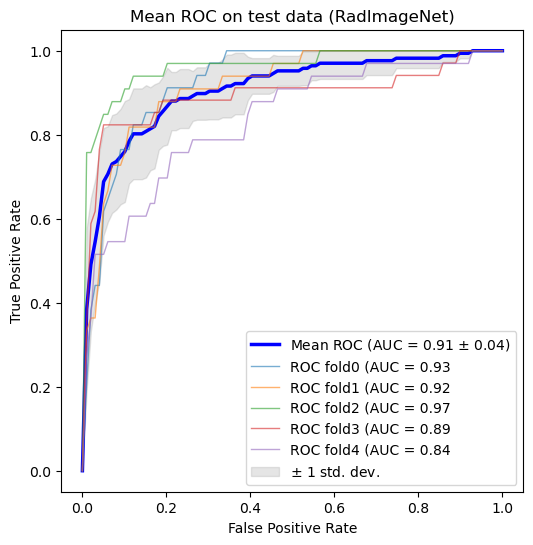

In [8]:
#database = RadImageNet

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
data_generator = ImageDataGenerator(rescale=1./255,
                                    preprocessing_function=preprocess_input)
for i in range(5): #fivefold cross-validation
    test_path = os.path.join(current_directory,"radimagenet/Workspace/Replicate_article/data/breast_splits/test_fold"+str(i+1)+".csv")
    df_test=pd.read_csv(test_path)
    test_generator = data_generator.flow_from_dataframe(
        dataframe=df_test,
        directory=current_directory,
        x_col = 'path',
        y_col = 'class',
        target_size=(image_size, image_size),
        batch_size=len(df_test),
        shuffle=False,
        seed=726,
        class_mode='categorical')
    w_path = os.path.join(current_directory,"radimagenet/Anders/Eksperiment1/Mei/pretrained_RadNet/weights/fold"+str(i+1)+"-" + model_name_RadNet + "-"+str(lr)+ ".h5")
    FT_model = load_model(w_path, compile=False)

    probs = FT_model.predict(test_generator)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    ylabels = test_generator.classes
    # calculate scores
    _auc = roc_auc_score(ylabels, probs)
    # calculate roc curves
    fpr, tpr, _ = roc_curve(ylabels, probs)
    del FT_model

    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(_auc)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
RadImgNet_mean_tpr = mean_tpr
mean_auc = auc(mean_fpr, mean_tpr)
RadImgNet_mean_auc = mean_auc
std_auc = np.std(aucs)
std_tpr = np.std(tprs, axis=0)
#Plot:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
for j in range(5):
    ax.plot(
        mean_fpr,
        tprs[j],
        #color="b",
        label=r"ROC fold%i (AUC = %0.2f" % (j, aucs[j]),
        lw=1,
        alpha=0.6,
    )
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC on test data (RadImageNet)",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

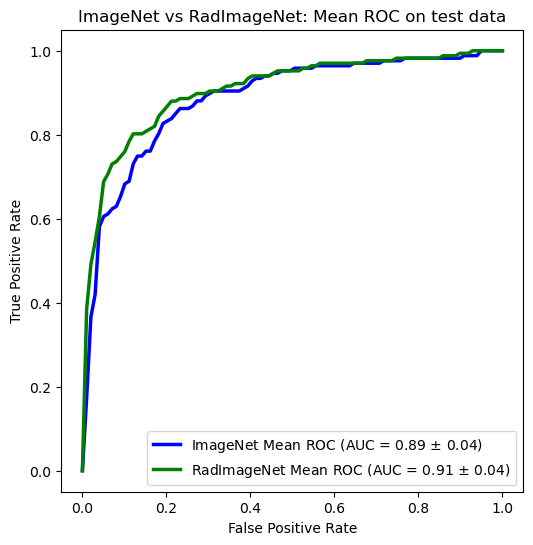

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(
    mean_fpr,
    ImgNet_mean_tpr,
    color="b",
    label=r"ImageNet Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (ImgNet_mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
ax.plot(
    mean_fpr,
    RadImgNet_mean_tpr,
    color="g",
    label=r"RadImageNet Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (RadImgNet_mean_auc, std_auc),
    lw=2.5,
    alpha=1,
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ImageNet vs RadImageNet: Mean ROC on test data",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()